In [3]:
import pandas as pd
import errno    
import os
import numpy as np
import math

import pandas as pd
from sklearn import linear_model
from  matplotlib import pyplot 
import numpy as np

'''
Author: Enrico Ceccolini
    
'''

datadir = "/datasets/eurora_data/db1/"

infile_jobs_to_nodes = datadir + "job_nodes.csv"

suffix = "_5sec_"
### select an interval from
## 1 settings wholeData
#interval_comment_whole = "WholeData"

### select an interval from
## 2 settings Andrea
#interval_comment = "Andrea"
#start_time = pd.to_datetime('2014-03-31')
#end_time = pd.to_datetime('2014-05-01')
#infile_jobs = datadir + "april_long_jobs.csv"

## 3 settings Alina
interval_comment = "Alina"
start_time = pd.to_datetime('2014-03-31')
end_time = pd.to_datetime('2014-11-01')
train_start_time = pd.to_datetime('2014-03-31')
train_end_time = pd.to_datetime('2014-10-01')
test_end_time = pd.to_datetime('2014-11-01')


#infile_jobs = datadir + "CPUs/" + interval_comment + "/" + interval_comment + "_long_jobs_real_pow"
infile_jobs_trainset = datadir + "CPUs/" + interval_comment + "/" + interval_comment + "_trainset"
infile_jobs_testset = datadir + "CPUs/" + interval_comment + "/" + interval_comment + "_testset"

In [4]:
jobs_train = pd.read_csv(infile_jobs_trainset + ".csv", index_col=0)
print("train set contains {} records".format(jobs_train.shape[0]))
jobs_test = pd.read_csv(infile_jobs_testset + ".csv", index_col=0)
print("test set contains {} records".format(jobs_test.shape[0]))

train set contains 146901 records
test set contains 18224 records


In [102]:
import matplotlib.pyplot as plt

def my_scatter_plot(x_values, y_values, xy_min, xy_lim, title=""):

    #fig, = plt.figure(figsize=(9, 9))  
    
    fig, ax = plt.subplots(figsize=(9, 9))
    
    x1 = [0, xy_lim]
    y1 = [0, xy_lim]
    ax.plot(x1, y1, 'gray', linestyle=':', marker='')
    
    plt.xlabel('real pow (w)', fontsize=18)
    plt.ylabel('predicted pow (w)', fontsize=18)
    plt.title(title, fontsize=20)

    plt.xlim(xy_min, xy_lim)
    plt.ylim(xy_min, xy_lim)
    plt.gca().set_aspect('equal', adjustable='box')
    
    #visualize results
    pyplot.scatter(x_values, y_values)
    pyplot.plot()

    plt.show()

## Method 1

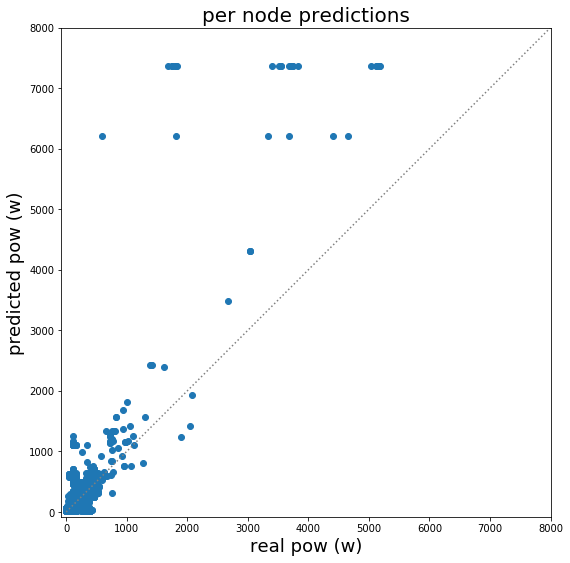

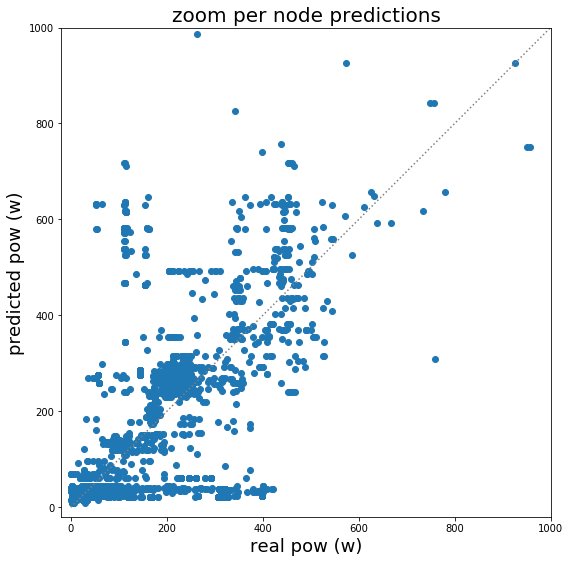

In [103]:
job_to_test = jobs_test[jobs_test['pred_perNode'] != -1] # some users are unknown
my_scatter_plot(title="per node predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perNode'], xy_min=-80, xy_lim=8000)
my_scatter_plot(title="zoom per node predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perNode'], xy_min=-20, xy_lim=1000)

## Method 2

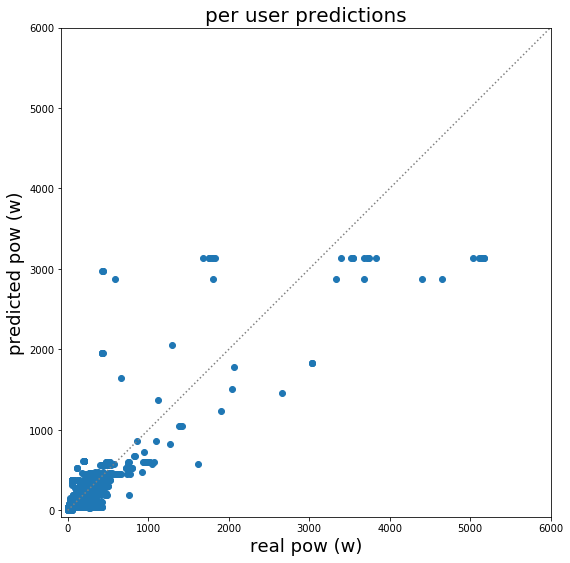

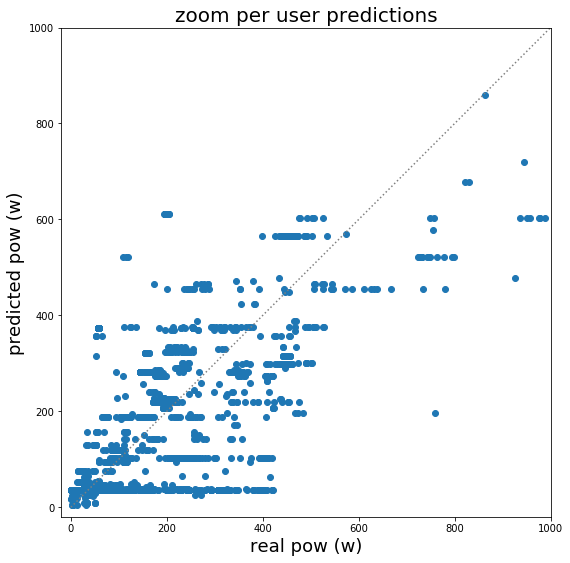

In [104]:
job_to_test = jobs_test[jobs_test['pred_perUser'] != -1] # some users are unknown
my_scatter_plot(title="per user predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUser'], xy_min=-80, xy_lim=6000)
my_scatter_plot(title="zoom per user predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUser'], xy_min=-20, xy_lim=1000)

## Method 3

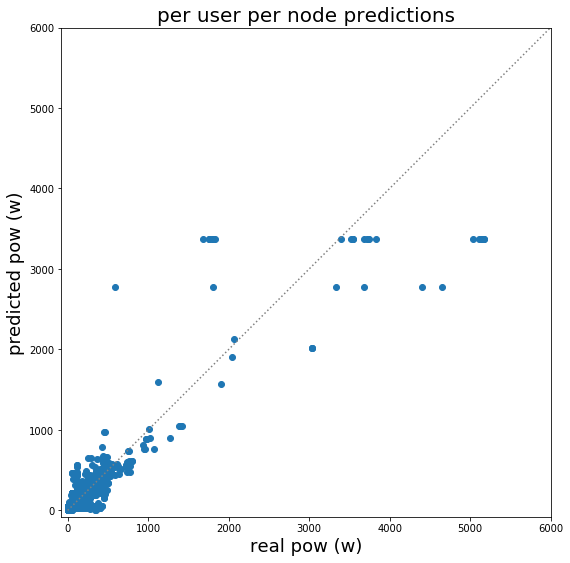

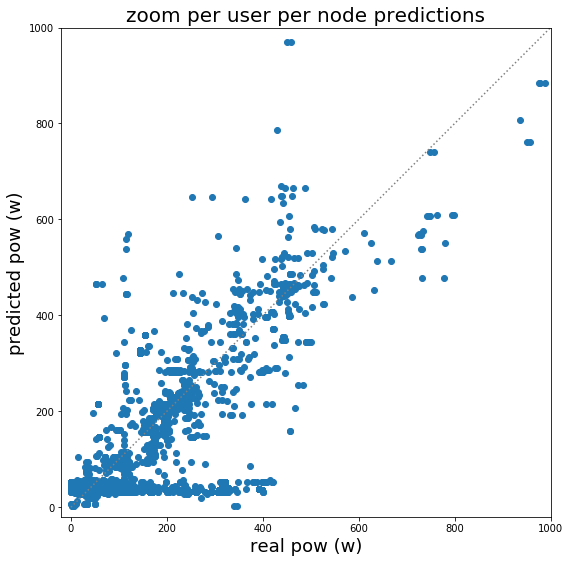

In [105]:
job_to_test = jobs_test[jobs_test['pred_perUserNode'] != -1] # some users are unknown
my_scatter_plot(title="per user per node predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUserNode'], xy_min=-80, xy_lim=6000)
my_scatter_plot(title="zoom per user per node predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUserNode'], xy_min=-20, xy_lim=1000)

## Method 4

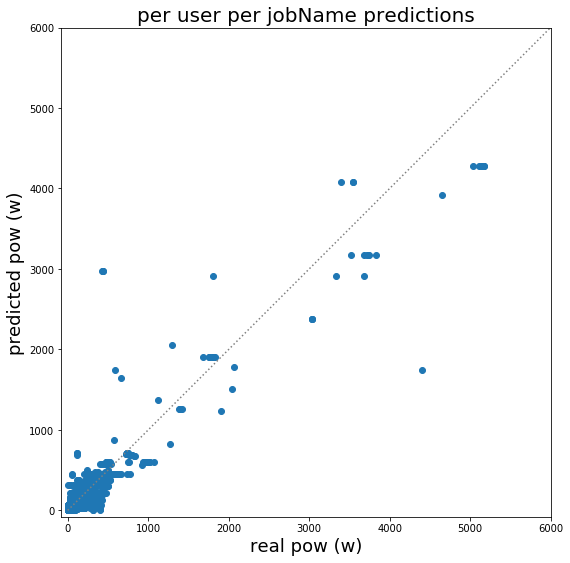

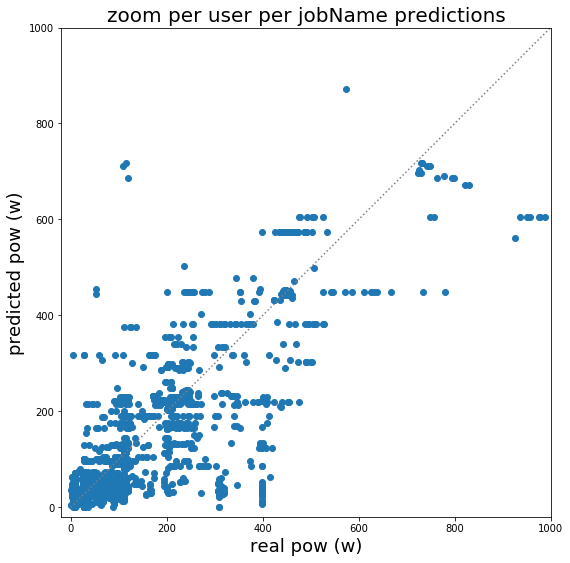

In [106]:
job_to_test = jobs_test[jobs_test['pred_perUserJob'] != -1] # some users are unknown
my_scatter_plot(title="per user per jobName predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUserJob'], xy_min=-80, xy_lim=6000)
my_scatter_plot(title="zoom per user per jobName predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUserJob'], xy_min=-20, xy_lim=1000)

## Method 5

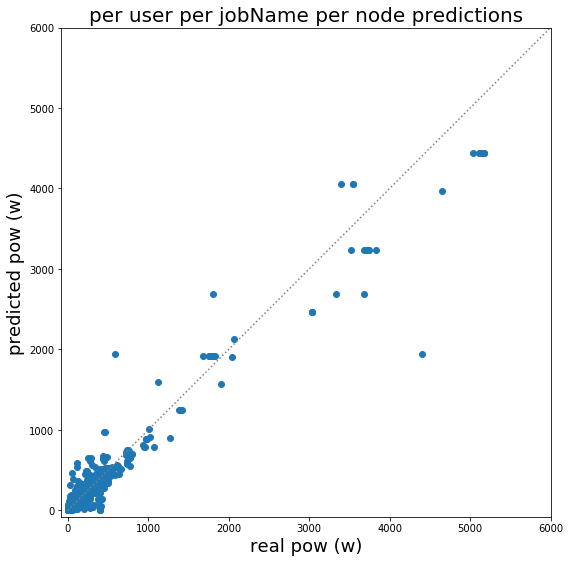

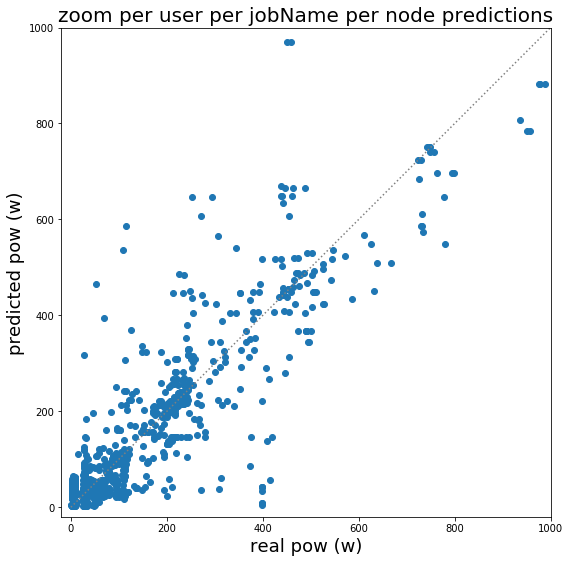

In [107]:
job_to_test = jobs_test[jobs_test['pred_perUserJobNode'] != -1] # some users are unknown
my_scatter_plot(title="per user per jobName per node predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUserJobNode'], xy_min=-80, xy_lim=6000)
my_scatter_plot(title="zoom per user per jobName per node predictions", x_values=job_to_test['real_pow'], y_values=job_to_test['pred_perUserJobNode'], xy_min=-20, xy_lim=1000)